In [59]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical operations


In [60]:
df = pd.read_csv('C:/Users/adhar/Downloads/cvd-healthcare-data.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
X=df.drop('target',axis=1)
y=df['target']

In [64]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=2) #splitting the data into training and testing samples

# 1. Random Forest Classifier:

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_class = RandomForestClassifier(n_estimators=20,oob_score =True)

In [68]:
rf_class.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, oob_score=True)

In [69]:
y_pred= rf_class.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

In [71]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[25  7]
 [ 2 27]]
0.8524590163934426
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.86        29

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



confusion matrix

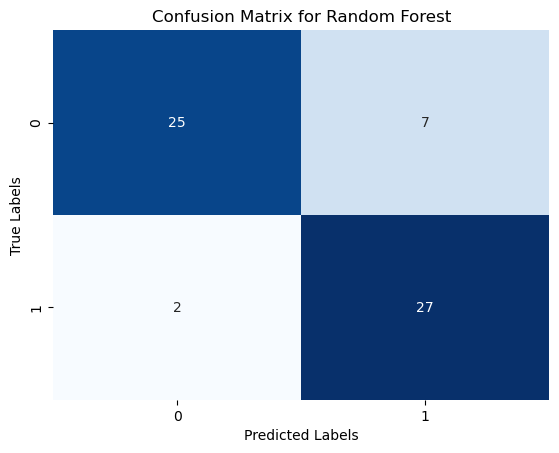

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()


# 2. Logistic Regression :

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state= 0)
logreg.fit(X_train,y_train)
pred_y_logreg = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,pred_y_logreg))
print(accuracy_score(y_test,pred_y_logreg))
print(classification_report(y_test,pred_y_logreg))
print(precision_score(y_test, pred_y_logreg))
print(recall_score(y_test, pred_y_logreg))
print(f1_score(y_test, pred_y_logreg))

[[26  6]
 [ 0 29]]
0.9016393442622951
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61

0.8285714285714286
1.0
0.90625


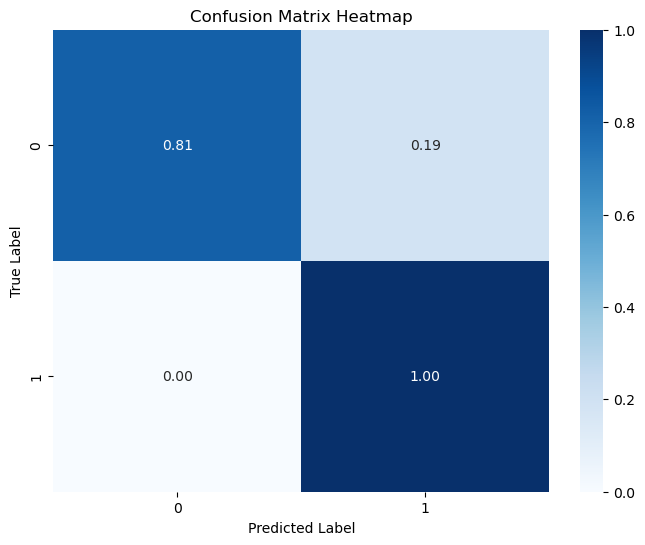

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Create a confusion matrix
cm = confusion_matrix(y_test, pred_y_logreg)
ac=accuracy_score(y_test,pred_y_logreg)

# Normalize the confusion matrix if needed
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [75]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# 3. KNN -   K- Nearest Neighbour:

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
pred_y_knn= knn.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
print(confusion_matrix(y_test,pred_y_knn))
print(accuracy_score(y_test,pred_y_knn))
print(classification_report(y_test,pred_y_knn))
print(precision_score(y_test, pred_y_knn))
print(recall_score(y_test, pred_y_knn))
print(f1_score(y_test, pred_y_knn))

[[20 12]
 [ 3 26]]
0.7540983606557377
              precision    recall  f1-score   support

           0       0.87      0.62      0.73        32
           1       0.68      0.90      0.78        29

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61

0.6842105263157895
0.896551724137931
0.7761194029850746


# 4.  SVM - Support Vector Machine  :

### a) linear kernal

In [77]:
from sklearn import svm
clf=svm.SVC(kernel='linear',C=0.03,gamma=0.09,decision_function_shape='ovr')
clf.fit(X_train,y_train)
pred_y_svm_lin =clf.predict(X_test)
print(confusion_matrix(y_test,pred_y_svm_lin))
print(accuracy_score(y_test,pred_y_svm_lin))
print(classification_report(y_test,pred_y_svm_lin))
print(precision_score(y_test, pred_y_svm_lin))
print(recall_score(y_test, pred_y_svm_lin))
print(f1_score(y_test, pred_y_svm_lin))

[[27  5]
 [ 1 28]]
0.9016393442622951
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.85      0.97      0.90        29

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61

0.8484848484848485
0.9655172413793104
0.9032258064516129


### b) polynomial kernel

In [78]:
from sklearn import svm
clf=svm.SVC(kernel='poly',C=0.95,decision_function_shape='ovr')
clf.fit(X_train,y_train)
pred_y_svm =clf.predict(X_test)
print(confusion_matrix(y_test,pred_y_svm))
print(accuracy_score(y_test,pred_y_svm))
print(classification_report(y_test,pred_y_svm))
print(precision_score(y_test, pred_y_svm))
print(recall_score(y_test, pred_y_svm))
print(f1_score(y_test, pred_y_svm))

[[18 14]
 [ 2 27]]
0.7377049180327869
              precision    recall  f1-score   support

           0       0.90      0.56      0.69        32
           1       0.66      0.93      0.77        29

    accuracy                           0.74        61
   macro avg       0.78      0.75      0.73        61
weighted avg       0.79      0.74      0.73        61

0.6585365853658537
0.9310344827586207
0.7714285714285715


### c) rbf kernel 

In [79]:
from sklearn import svm
clf=svm.SVC(kernel='rbf',C=0.9,decision_function_shape='ovr')
clf.fit(X_train,y_train)
pred_y_svm =clf.predict(X_test)
print(confusion_matrix(y_test,pred_y_svm))
print(accuracy_score(y_test,pred_y_svm))
print(classification_report(y_test,pred_y_svm))
print(precision_score(y_test, pred_y_svm))
print(recall_score(y_test, pred_y_svm))
print(f1_score(y_test, pred_y_svm))


[[12 20]
 [ 2 27]]
0.639344262295082
              precision    recall  f1-score   support

           0       0.86      0.38      0.52        32
           1       0.57      0.93      0.71        29

    accuracy                           0.64        61
   macro avg       0.72      0.65      0.62        61
weighted avg       0.72      0.64      0.61        61

0.574468085106383
0.9310344827586207
0.7105263157894737


### d) sigmoid 

In [80]:
from sklearn import svm
clf=svm.SVC(kernel='sigmoid',C=0.2,decision_function_shape='ovr')
clf.fit(X_train,y_train)
pred_y_svm =clf.predict(X_test)
print(confusion_matrix(y_test,pred_y_svm))
print(accuracy_score(y_test,pred_y_svm))
print(classification_report(y_test,pred_y_svm))
print(precision_score(y_test, pred_y_svm))
print(recall_score(y_test, pred_y_svm))
print(f1_score(y_test, pred_y_svm))

[[ 0 32]
 [ 0 29]]
0.47540983606557374
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.48      1.00      0.64        29

    accuracy                           0.48        61
   macro avg       0.24      0.50      0.32        61
weighted avg       0.23      0.48      0.31        61

0.47540983606557374
1.0
0.6444444444444445


# 5. Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtree=  DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
pred_y_dt =dtree.predict(X_test)
print(confusion_matrix(y_test,pred_y_dt))
print(accuracy_score(y_test,pred_y_dt))
print(classification_report(y_test,pred_y_dt))
print(precision_score(y_test, pred_y_dt))
print(recall_score(y_test, pred_y_dt))
print(f1_score(y_test, pred_y_dt))

[[25  7]
 [ 2 27]]
0.8524590163934426
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        32
           1       0.79      0.93      0.86        29

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

0.7941176470588235
0.9310344827586207
0.8571428571428571


# 6.  Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
pred_y_nb = nb_classifier.predict(X_test)
print(confusion_matrix(y_test,pred_y_nb))
print(accuracy_score(y_test,pred_y_nb))
print(classification_report(y_test,pred_y_nb))
print(precision_score(y_test, pred_y_nb))
print(recall_score(y_test, pred_y_nb))
print(f1_score(y_test, pred_y_nb))

[[28  4]
 [ 3 26]]
0.8852459016393442
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

0.8666666666666667
0.896551724137931
0.8813559322033899


# BOOSTING

# 7. GradientBoost

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(learning_rate=0.1)
grad_boost.fit(X_train,y_train)
y_pred_grad = grad_boost.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
print(confusion_matrix(y_test, y_pred_grad))
print(accuracy_score(y_test,y_pred_grad))
print(classification_report(y_test,y_pred_grad))
print(precision_score(y_test, y_pred_grad))
print(recall_score(y_test, y_pred_grad))
print(f1_score(y_test, y_pred_grad))

[[25  7]
 [ 0 29]]
0.8852459016393442
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        32
           1       0.81      1.00      0.89        29

    accuracy                           0.89        61
   macro avg       0.90      0.89      0.88        61
weighted avg       0.91      0.89      0.88        61

0.8055555555555556
1.0
0.8923076923076924


# 8. AdaBoost

In [87]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost =AdaBoostClassifier()
ada_boost.fit(X_train,y_train)
y_pred_ada = ada_boost.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
print(confusion_matrix(y_test, y_pred_ada))
print(accuracy_score(y_test,y_pred_ada))
print(classification_report(y_test,y_pred_ada))
print(precision_score(y_test, y_pred_ada))
print(recall_score(y_test, y_pred_ada))
print(f1_score(y_test, y_pred_ada))

[[25  7]
 [ 0 29]]
0.8852459016393442
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        32
           1       0.81      1.00      0.89        29

    accuracy                           0.89        61
   macro avg       0.90      0.89      0.88        61
weighted avg       0.91      0.89      0.88        61

0.8055555555555556
1.0
0.8923076923076924


# Xgboost

In [88]:
from xgboost import XGBClassifier
xg_boost =XGBClassifier()
xg_boost.fit(X_train,y_train)
y_pred_xg = xg_boost.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
print(confusion_matrix(y_test, y_pred_xg))
print(accuracy_score(y_test,y_pred_xg))
print(classification_report(y_test,y_pred_xg))
print(precision_score(y_test, y_pred_xg))
print(recall_score(y_test, y_pred_xg))
print(f1_score(y_test, y_pred_xg))

[[24  8]
 [ 1 28]]
0.8524590163934426
              precision    recall  f1-score   support

           0       0.96      0.75      0.84        32
           1       0.78      0.97      0.86        29

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61

0.7777777777777778
0.9655172413793104
0.8615384615384615


# manual Hyperparameter

In [ ]:
#manual

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a sample dataset (you should replace this with your own dataset)
X=df.drop('target',axis=1)
y=df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_reg = LogisticRegression()

# Define hyperparameter grid for manual tuning
param_grid = {
    'penalty': ['l1', 'l2'],        # Regularization term
    'C': [0.001, 0.01, 0.1, 1, 10]   # Inverse of regularization strength
}

# Create a GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_logistic_reg = grid_search.best_estimator_
y_pred = best_logistic_reg.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
ac=accuracy_score(y_test, y_pred)

# Normalize the confusion matrix if needed
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create logistic regression model
logistic_reg = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 1500, 2000],
    'C': uniform(loc=0, scale=4)  # Using uniform distribution for C
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    logistic_reg,
    param_distributions=param_grid,
    n_iter=10,            # Number of parameter settings that are sampled
    cv=5,                 # Number of cross-validation folds
    random_state=42       # Set a random seed for reproducibility
)

# Fit the model
random_search.fit(X_train, y_train)  # Make sure to replace X_train, y_train with your training data

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_logistic_reg = random_search.best_estimator_

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
explainer = LimeTabularExplainer(X_train.values,feature_names = X_train.columns.values.tolist(),class_names=['TYPE'],mode="regression")
exap = explainer.explain_instance(X_train.values[101],best_logistic_reg.predict,num_features=6)

In [ ]:
exap.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exap.show_in_notebook(show_table= True)

In [ ]:
exap = explainer.explain_instance(X_train.values[85],best_logistic_reg.predict,num_features=6)
exap.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()
exap.show_in_notebook(show_table= True)

In [ ]:
exap = explainer.explain_instance(X_train.values[15],best_logistic_reg.predict,num_features=6)
exap.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()
exap.show_in_notebook(show_table= True)

In [ ]:
pip install shap

In [ ]:
pip install shapash

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer(best_logistic_reg)
xpl.compile(x=X_test)
xpl.plot.features_importance()

In [ ]:
xpl.plot.contribution_plot('cp')